In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SN2.csv to SN2.csv


In [ ]:
df = pd.read_csv('SN2.csv')

In [ ]:
df.head()

,S.No,Parking Name,Yes/No,Review,Area,District,Year
0,1,ABC,Yes,"It is a valid place to park, but untidy",Hadapsar,Pune,2020
1,2,ABC,Yes,gh@gmail.com,Hadapsar,Pune,2020
2,3,GHI,Yes,Valid Parking but huge traffic,Juhu Beach,Mumbai,2020
3,4,ABC,Yes,Authentic@@@,Hadapsar,Pune,2020
4,5,GHI,Yes,"It is a valid place to park, but untidy",Juhu Beach,Mumbai,2020


In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@', '', text) #Removing '@' from the text
 text = re.sub('#', '', text) # Removing '#' hash tag from the text
 text = re.sub('.com','', text) #Removing '.com' from the text
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Review'] = df['Review'].apply(cleanTxt)

# Show the cleaned tweets
df

,S.No,Parking Name,Yes/No,Review,Area,District,Year
0,1,ABC,Yes,"It is a valid place to park, but untidy",Hadapsar,Pune,2020
1,2,ABC,Yes,ghgmail,Hadapsar,Pune,2020
2,3,GHI,Yes,Valid Parking but huge traffic,Juhu Beach,Mumbai,2020
3,4,ABC,Yes,Authentic,Hadapsar,Pune,2020
4,5,GHI,Yes,"It is a valid place to park, but untidy",Juhu Beach,Mumbai,2020
...,...,...,...,...,...,...,...
95,96,STU,No,Not valid,Mayani Bird Sanctuary,Satara,2021
96,97,PQR,Yes,Yes it is,Ajinkyatara Fort,Satara,2021
97,98,STU,No,"Car got stolen away, its not authentic",Mayani Bird Sanctuary,Satara,2021
98,99,PQR,Yes,Yes parking,Ajinkyatara Fort,Satara,2021


In [ ]:
#Create a function to get their subjectivity

def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get their polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns

df['Subjectivity'] =df['Review'].apply(getsubjectivity)
df['Polarity'] =df['Review'].apply(getPolarity)

df

,S.No,Parking Name,Yes/No,Review,Area,District,Year,Subjectivity,Polarity
0,1,ABC,Yes,"It is a valid place to park, but untidy",Hadapsar,Pune,2020,0.00,0.00
1,2,ABC,Yes,ghgmail,Hadapsar,Pune,2020,0.00,0.00
2,3,GHI,Yes,Valid Parking but huge traffic,Juhu Beach,Mumbai,2020,0.90,0.40
3,4,ABC,Yes,Authentic,Hadapsar,Pune,2020,0.75,0.50
4,5,GHI,Yes,"It is a valid place to park, but untidy",Juhu Beach,Mumbai,2020,0.00,0.00
...,...,...,...,...,...,...,...,...,...
95,96,STU,No,Not valid,Mayani Bird Sanctuary,Satara,2021,0.00,0.00
96,97,PQR,Yes,Yes it is,Ajinkyatara Fort,Satara,2021,0.00,0.00
97,98,STU,No,"Car got stolen away, its not authentic",Mayani Bird Sanctuary,Satara,2021,0.75,-0.25
98,99,PQR,Yes,Yes parking,Ajinkyatara Fort,Satara,2021,0.00,0.00


In [ ]:
#Create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,S.No,Parking Name,Yes/No,Review,Area,District,Year,Subjectivity,Polarity,Analysis
0,1,ABC,Yes,"It is a valid place to park, but untidy",Hadapsar,Pune,2020,0.00,0.00,Neutral
1,2,ABC,Yes,ghgmail,Hadapsar,Pune,2020,0.00,0.00,Neutral
2,3,GHI,Yes,Valid Parking but huge traffic,Juhu Beach,Mumbai,2020,0.90,0.40,Positive
3,4,ABC,Yes,Authentic,Hadapsar,Pune,2020,0.75,0.50,Positive
4,5,GHI,Yes,"It is a valid place to park, but untidy",Juhu Beach,Mumbai,2020,0.00,0.00,Neutral
...,...,...,...,...,...,...,...,...,...,...
95,96,STU,No,Not valid,Mayani Bird Sanctuary,Satara,2021,0.00,0.00,Neutral
96,97,PQR,Yes,Yes it is,Ajinkyatara Fort,Satara,2021,0.00,0.00,Neutral
97,98,STU,No,"Car got stolen away, its not authentic",Mayani Bird Sanctuary,Satara,2021,0.75,-0.25,Negative
98,99,PQR,Yes,Yes parking,Ajinkyatara Fort,Satara,2021,0.00,0.00,Neutral


In [ ]:
#Create a function to print all positive reviews

i = 1
sortedDF =df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(i)+ ')'+sortedDF['Review'][i])
    print()
    i = i+1

2)Valid Parking but huge traffic

3)Authentic

6)Valid Parking but huge traffic

10)Valid Parking but huge traffic

14)Okay parking

37)Valid Parking but huge traffic

41)Valid Parking but huge traffic

45)Valid Parking but huge traffic

49)Okay parking

54)Valid Parking but huge traffic

57)Valid Parking but huge traffic

60)Valid Parking but huge traffic

63)Valid Parking but huge traffic

78)Cool place



In [ ]:
#Create a function to print all positive reviews

j = 1
sortedDF =df.sort_values(by=['Polarity'])
for j in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][j] == 'Negative'):
    print(str(j)+ ')'+sortedDF['Review'][j])
    print()
    j = j+1

15)Car got stolen away, its not authentic

17)Car mirror was broken, not a place to park

18)Tire was flat, not a good place to park

19)Car got stolen away, its not authentic

21)Car mirror was broken, not a place to park

22)Tire was flat, not a good place to park

23)Car got stolen away, its not authentic

25)Car mirror was broken, not a place to park

26)Tire was flat, not a good place to park

27)Car got stolen away, its not authentic

29)Car mirror was broken, but it is a reputed parking

30)Tire was flat, not a good place to park

32)Car mirror was broken, not a place to park

33)Tire was flat, not a good place to park

34)Car got stolen away, its not authentic

70)Car got stolen away, its not authentic

71)Car mirror was broken yet a reputated one

74)Car got stolen away, its not authentic

83)Car got stolen away, its not authentic

85)Car got stolen away, its not authentic

93)Car got stolen away, its not authentic

97)Car got stolen away, its not authentic



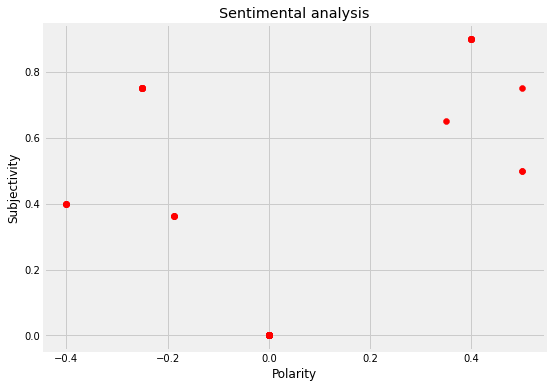

In [ ]:
#Plotting a grpah for Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color ="Red")

plt.title("Sentimental analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [ ]:
#Percentages of positive comments

previews =df[df.Analysis == 'Positive']
previews = previews['Review']

round(previews.shape[0] / df.shape[0] * 100 , 1)

14.0

In [ ]:
#Percentages of positive comments

nreviews =df[df.Analysis == 'Negative']
nreviews = nreviews['Review']

round(nreviews.shape[0] / df.shape[0] * 100 , 1)

22.0

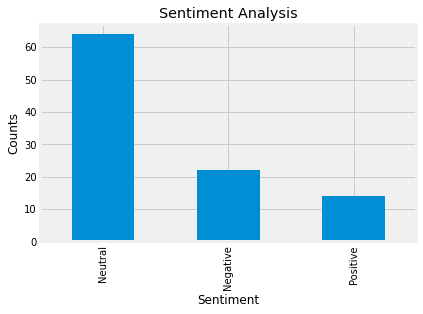

In [ ]:
#Show the value of each category

df['Analysis'].value_counts()


#plot and visualise the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()